In [859]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import math
%matplotlib inline

In [860]:
crop_df = pd.read_csv('Crop_recommendation.csv')

In [861]:
crop_df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [862]:
crop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [863]:
crop_df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

/Users/glipne/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='N', ylabel='Density'>

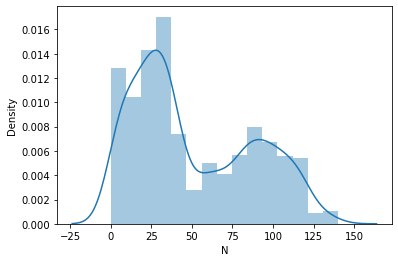

In [864]:
sns.distplot(crop_df['N'])

/Users/glipne/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='P', ylabel='Density'>

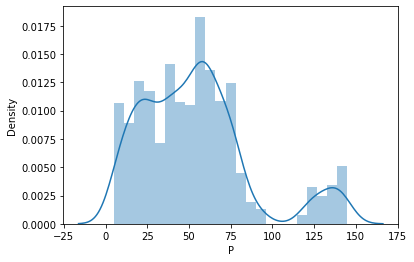

In [865]:
sns.distplot(crop_df['P'])

/Users/glipne/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='K', ylabel='Density'>

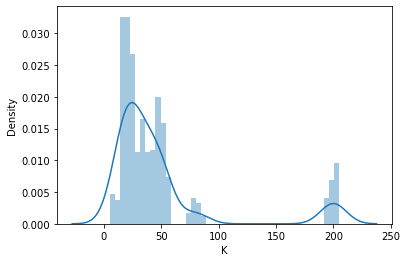

In [866]:
sns.distplot(crop_df['K'])

In [867]:
crop_df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [868]:
crop_df['N'].describe()

count    2200.000000
mean       50.551818
std        36.917334
min         0.000000
25%        21.000000
50%        37.000000
75%        84.250000
max       140.000000
Name: N, dtype: float64

In [869]:
crop_df.shape

(2200, 8)

In [870]:
import matplotlib.pyplot as plt

<AxesSubplot:>

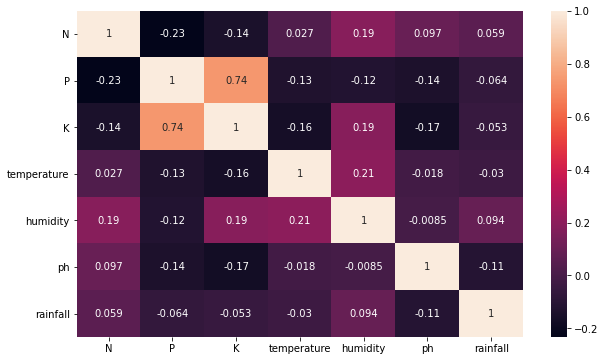

In [871]:
corr_df = crop_df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10,6)) 
sns.heatmap(corr_df, annot=True)

In [872]:
from math import log, exp

# With column N

In [873]:
crop_df[(crop_df['rainfall']==0)]

,N,P,K,temperature,humidity,ph,rainfall,label


In [874]:
crop_df = crop_df[(crop_df['N']!=0)]

In [875]:
crop_df.shape

(2173, 8)

<AxesSubplot:>

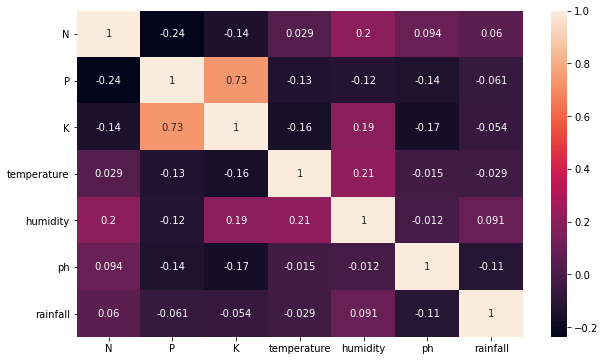

In [876]:
corr_df = crop_df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10,6)) 
sns.heatmap(corr_df, annot=True)

In [877]:
crop_df['N_log'] = crop_df['N'].apply(lambda x: log(x))

/Users/glipne/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='N_log', ylabel='Density'>

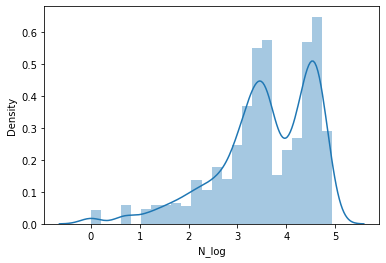

In [878]:
sns.distplot(crop_df['N_log'])

In [879]:
crop_df['N_sqrt'] = crop_df['N'].apply(lambda x: math.sqrt(x))

/Users/glipne/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='N_sqrt', ylabel='Density'>

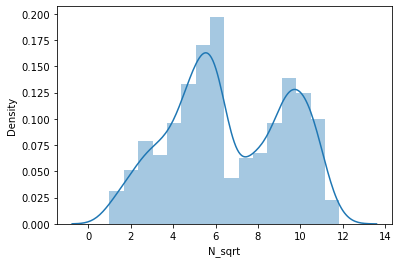

In [880]:
sns.distplot(crop_df['N_sqrt'])

In [881]:
from scipy.stats import boxcox

In [882]:
from numpy import exp

In [883]:
crop_df['N_boxcox'] = exp(crop_df['N'])

In [884]:
crop_df['N_boxcox'] = boxcox(crop_df['N_boxcox'], 0)

/Users/glipne/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='N_boxcox', ylabel='Density'>

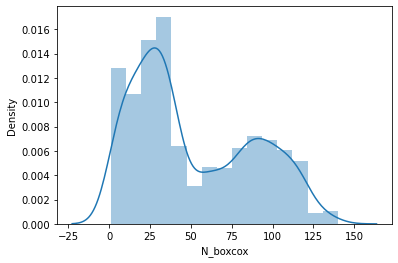

In [885]:
sns.distplot(crop_df['N_boxcox'])

In [886]:
print("Upper limit= ",round((crop_df['N_log'].mean()+3*crop_df['N_log'].std()),2))
print("Lower limit= ",round((crop_df['N_log'].mean()-3*crop_df['N_log'].std()),2))

Upper limit=  6.57
Lower limit=  0.56


In [887]:
for per in range(0,10):
    per_i = 99+(per/10)
    print('99.',per,'th percentile is ',np.percentile(crop_df['N_log'],per_i))


99. 0 th percentile is  4.8619745772679686
99. 1 th percentile is  4.875197323201151
99. 2 th percentile is  4.875197323201151
99. 3 th percentile is  4.875197323201151
99. 4 th percentile is  4.882801922586371
99. 5 th percentile is  4.890349128221754
99. 6 th percentile is  4.89268621780125
99. 7 th percentile is  4.90143832953887
99. 8 th percentile is  4.912654885736052
99. 9 th percentile is  4.940409442418986


In [888]:
for per in range(0,10):
    per_i = (per/10)
    print('0.',per,'th percentile is ',np.percentile(crop_df['N_log'],per_i))

0. 0 th percentile is  0.0
0. 1 th percentile is  0.0
0. 2 th percentile is  0.0
0. 3 th percentile is  0.0
0. 4 th percentile is  0.0
0. 5 th percentile is  0.0
0. 6 th percentile is  0.0
0. 7 th percentile is  0.0
0. 8 th percentile is  0.0
0. 9 th percentile is  0.37984465494685127


In [889]:
crop_df1 = crop_df[crop_df['N_log']<4.90]

In [890]:
crop_df[crop_df['N_log']<=0.37].shape

(20, 11)

In [891]:
crop_df1 = crop_df[crop_df['N_log']>0.37]

In [892]:
crop_df1.shape

(2153, 11)

# P

In [893]:
crop_df1['P_log'] = crop_df1['P'].apply(lambda x: log(x))

<ipython-input-893-d7556469bff3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_df1['P_log'] = crop_df1['P'].apply(lambda x: log(x))


/Users/glipne/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='P_log', ylabel='Density'>

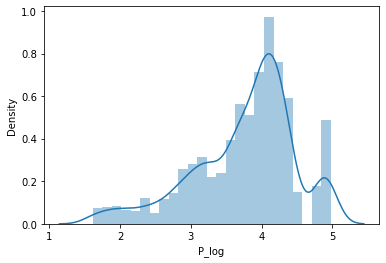

In [894]:
sns.distplot(crop_df1['P_log'])

In [895]:
crop_df1['P_boxcox'] = exp(crop_df1['P'])

<ipython-input-895-0a41464cdbda>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_df1['P_boxcox'] = exp(crop_df1['P'])


In [896]:
crop_df1['P_boxcox'] = boxcox(crop_df1['P_boxcox'], 0)

<ipython-input-896-ff22675eea52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_df1['P_boxcox'] = boxcox(crop_df1['P_boxcox'], 0)


/Users/glipne/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='P_boxcox', ylabel='Density'>

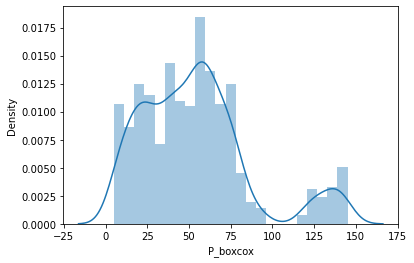

In [897]:
sns.distplot(crop_df1['P_boxcox'])

In [898]:
for per in range(0,10):
    per_i = 99+(per/10)
    print('99.',per,'th percentile is ',np.percentile(crop_df1['P_log'],per_i))



99. 0 th percentile is  4.962844630259907
99. 1 th percentile is  4.962844630259907
99. 2 th percentile is  4.969813299576001
99. 3 th percentile is  4.969813299576001
99. 4 th percentile is  4.969813299576001
99. 5 th percentile is  4.969813299576001
99. 6 th percentile is  4.969813299576001
99. 7 th percentile is  4.973578020483448
99. 8 th percentile is  4.976733742420574
99. 9 th percentile is  4.976733742420574


In [899]:
crop_df1[crop_df1['P_log']>4.969813299576001].shape

(7, 13)

In [900]:
for per in range(0,10):
    per_i = (per/10)
    print('0.',per,'th percentile is ',np.percentile(crop_df1['P_log'],per_i))



0. 0 th percentile is  1.6094379124341003
0. 1 th percentile is  1.6094379124341003
0. 2 th percentile is  1.6094379124341
0. 3 th percentile is  1.6094379124341003
0. 4 th percentile is  1.6094379124341003
0. 5 th percentile is  1.6094379124341003
0. 6 th percentile is  1.6094379124341005
0. 7 th percentile is  1.6094379124341003
0. 8 th percentile is  1.6094379124341003
0. 9 th percentile is  1.6094379124341003


In [901]:
crop_df1[crop_df1['P_log']>1.6094379124341003].shape

(2132, 13)

In [902]:
crop_df2 = crop_df1[(crop_df1['P_log']<4.969813299576001)|(crop_df1['P_log']>1.6094379124341003)]

In [903]:
crop_df2.shape

(2153, 13)

# K

In [904]:
crop_df2['K_log'] = crop_df2['K'].apply(lambda x: log(x))

/Users/glipne/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='K_log', ylabel='Density'>

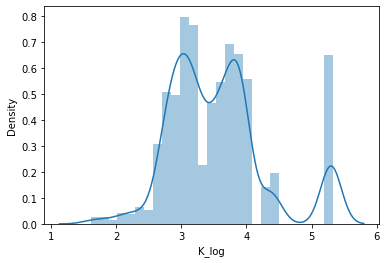

In [905]:
sns.distplot(crop_df2['K_log'])

In [906]:
for per in range(0,10):
    per_i = 99+(per/10)
    print('99.',per,'th percentile is ',np.percentile(crop_df2['K_log'],per_i))

99. 0 th percentile is  5.318119993844216
99. 1 th percentile is  5.318119993844216
99. 2 th percentile is  5.318119993844216
99. 3 th percentile is  5.3226970200795805
99. 4 th percentile is  5.3230099791384085
99. 5 th percentile is  5.3230099791384085
99. 6 th percentile is  5.3230099791384085
99. 7 th percentile is  5.3230099791384085
99. 8 th percentile is  5.3230099791384085
99. 9 th percentile is  5.3230099791384085


In [907]:
crop_df2[crop_df2['K_log']>= 5.3230099791384085].shape

(16, 14)

In [908]:
for per in range(0,10):
    per_i = (per/10)
    print('0.',per,'th percentile is ',np.percentile(crop_df2['K_log'],per_i))

0. 0 th percentile is  1.6094379124341003
0. 1 th percentile is  1.6094379124341003
0. 2 th percentile is  1.6094379124341
0. 3 th percentile is  1.6094379124341003
0. 4 th percentile is  1.791759469228055
0. 5 th percentile is  1.791759469228055
0. 6 th percentile is  1.791759469228055
0. 7 th percentile is  1.801625112736999
0. 8 th percentile is  1.9459101490553132
0. 9 th percentile is  1.995049701541138


In [909]:
crop_df2[crop_df2['K_log']<=1.6094379124341003].shape

(8, 14)

In [910]:
#crop_df3 = crop_df2[(crop_df2['K_log']<=5.3230099791384085)|(crop_df2['K_log']>=1.6094379124341003)]

In [911]:
crop_df2.shape

(2153, 14)

In [912]:
crop_df3 = crop_df2[crop_df2['K_log']<=5.3230099791384085]

In [913]:
crop_df3.shape

(2153, 14)

In [914]:
crop_df3 = crop_df3[crop_df3['K_log']>=1.6094379124341003]

In [915]:
crop_df3.shape

(2153, 14)

In [916]:
crop_df3.head()

,N,P,K,temperature,humidity,ph,rainfall,label,N_log,N_sqrt,N_boxcox,P_log,P_boxcox,K_log
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,4.499810,9.486833,90.0,3.737670,42.0,3.761200
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,4.442651,9.219544,85.0,4.060443,58.0,3.713572
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,4.094345,7.745967,60.0,4.007333,55.0,3.784190
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,4.304065,8.602325,74.0,3.555348,35.0,3.688879
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,4.356709,8.831761,78.0,3.737670,42.0,3.737670


# temperature

/Users/glipne/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='temperature', ylabel='Density'>

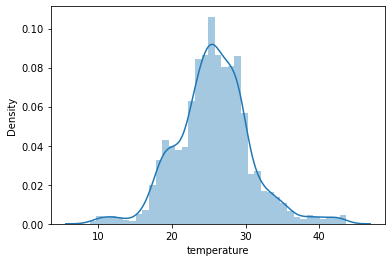

In [917]:
sns.distplot(crop_df3['temperature'])

In [918]:
for per in range(0,10):
    per_i = 99+(per/10)
    print('99.',per,'th percentile is ',np.percentile(crop_df3['temperature'],per_i))

99. 0 th percentile is  40.910462362800004
99. 1 th percentile is  41.19972334672
99. 2 th percentile is  41.35074633376001
99. 3 th percentile is  41.64090381408003
99. 4 th percentile is  42.077646781600016
99. 5 th percentile is  42.326360380399976
99. 6 th percentile is  42.66451186687995
99. 7 th percentile is  42.92892835768
99. 8 th percentile is  43.006411701039994
99. 9 th percentile is  43.26833233888009


In [919]:
crop_df3[crop_df3['temperature']>42.92892835768].shape

(7, 14)

In [920]:
for per in range(0,10):
    per_i = (per/10)
    print('0.',per,'th percentile is ',np.percentile(crop_df3['temperature'],per_i))

0. 0 th percentile is  8.825674745
0. 1 th percentile is  9.564294097336001
0. 2 th percentile is  9.881243310712
0. 3 th percentile is  10.08080906072
0. 4 th percentile is  10.32269430992
0. 5 th percentile is  10.64071011
0. 6 th percentile is  11.0102918156
0. 7 th percentile is  11.201018918719999
0. 8 th percentile is  11.51286896104
0. 9 th percentile is  11.73526817768


In [921]:
crop_df3[crop_df3['temperature']<10.08080906072].shape

(7, 14)

In [922]:
crop_df4 = crop_df3[crop_df3['temperature']<42.92892835768]

In [923]:
crop_df4.shape

(2146, 14)

In [924]:
crop_df4 = crop_df4[crop_df4['temperature']>10.08080906072]

In [925]:
crop_df4.shape

(2139, 14)

# Humidity

/Users/glipne/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='humidity', ylabel='Density'>

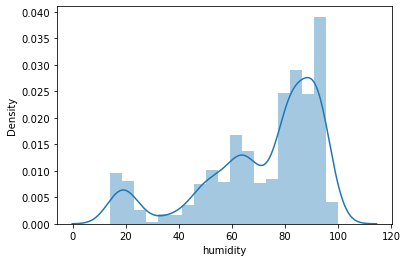

In [926]:
sns.distplot(crop_df4['humidity'])

In [927]:
for per in range(0,10):
    per_i = 99+(per/10)
    print('99.',per,'th percentile is ',np.percentile(crop_df4['humidity'],per_i))

99. 0 th percentile is  96.9550230766
99. 1 th percentile is  96.99464656504
99. 2 th percentile is  97.43417083400008
99. 3 th percentile is  97.77956373092003
99. 4 th percentile is  98.13314242108001
99. 5 th percentile is  98.45611979669998
99. 6 th percentile is  98.97575084255995
99. 7 th percentile is  99.52126451873994
99. 8 th percentile is  99.65467973876001
99. 9 th percentile is  99.82978295476002


In [928]:
for per in range(0,10):
    per_i = (per/10)
    print('0.',per,'th percentile is ',np.percentile(crop_df4['humidity'],per_i))

0. 0 th percentile is  14.25803981
0. 1 th percentile is  14.28631432338
0. 2 th percentile is  14.362237988439999
0. 3 th percentile is  14.44099715848
0. 4 th percentile is  14.699423117679999
0. 5 th percentile is  14.717912468300002
0. 6 th percentile is  14.756803842759998
0. 7 th percentile is  14.82474199898
0. 8 th percentile is  14.995006847760001
0. 9 th percentile is  15.122781836180001


In [929]:
crop_df4[crop_df4['humidity']>99.52126451873994].shape

(7, 14)

In [930]:
crop_df5 = crop_df4[crop_df4['humidity']<99.52126451873994]

In [931]:
crop_df5.shape

(2132, 14)

In [932]:
crop_df4[crop_df4['humidity']<14.44099715848].shape

(7, 14)

In [933]:
crop_df5 = crop_df5[crop_df5['humidity']>=14.44099715848]

In [934]:
crop_df5.shape

(2125, 14)

In [935]:
crop_df5.head()

,N,P,K,temperature,humidity,ph,rainfall,label,N_log,N_sqrt,N_boxcox,P_log,P_boxcox,K_log
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,4.499810,9.486833,90.0,3.737670,42.0,3.761200
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,4.442651,9.219544,85.0,4.060443,58.0,3.713572
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,4.094345,7.745967,60.0,4.007333,55.0,3.784190
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,4.304065,8.602325,74.0,3.555348,35.0,3.688879
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,4.356709,8.831761,78.0,3.737670,42.0,3.737670


# PH

/Users/glipne/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ph', ylabel='Density'>

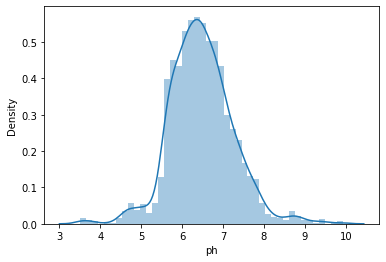

In [936]:
sns.distplot(crop_df5['ph'])

In [937]:
for per in range(0,10):
    per_i = 99+(per/10)
    print('99.',per,'th percentile is ',np.percentile(crop_df5['ph'],per_i))

99. 0 th percentile is  8.749605551039995
99. 1 th percentile is  8.821948545816
99. 2 th percentile is  8.8615377622
99. 3 th percentile is  8.869567650876
99. 4 th percentile is  8.916384214592004
99. 5 th percentile is  9.01828021622001
99. 6 th percentile is  9.136923394759997
99. 7 th percentile is  9.341133488528023
99. 8 th percentile is  9.413742443896
99. 9 th percentile is  9.651992191308045


In [938]:
for per in range(0,10):
    per_i = (per/10)
    print('0.',per,'th percentile is ',np.percentile(crop_df5['ph'],per_i))

0. 0 th percentile is  3.5047523139999996
0. 1 th percentile is  3.5261897784319998
0. 2 th percentile is  3.5920649374480003
0. 3 th percentile is  3.7417551401399995
0. 4 th percentile is  3.81815190884
0. 5 th percentile is  4.30389412362
0. 6 th percentile is  4.47940841628
0. 7 th percentile is  4.5226480187
0. 8 th percentile is  4.5463001587920004
0. 9 th percentile is  4.557052456172


In [939]:
crop_df5[crop_df5['ph']>9.338222779831996].shape

(7, 14)

In [940]:
crop_df6 = crop_df5[crop_df5['ph']<9.338222779831996]

In [941]:
crop_df6.shape

(2118, 14)

In [942]:
crop_df5[crop_df5['ph']<3.5939415083120005].shape

(5, 14)

In [943]:
crop_df6 = crop_df6[crop_df6['ph']>3.5939415083120005]

In [944]:
crop_df6.shape

(2113, 14)

In [945]:
crop_df6.head(1)

,N,P,K,temperature,humidity,ph,rainfall,label,N_log,N_sqrt,N_boxcox,P_log,P_boxcox,K_log
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,4.49981,9.486833,90.0,3.73767,42.0,3.7612


# rainfall

/Users/glipne/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rainfall', ylabel='Density'>

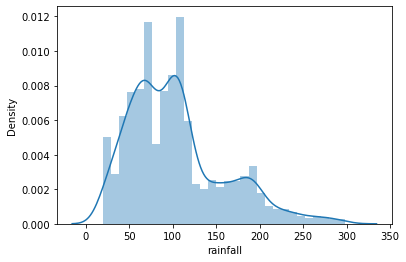

In [946]:
sns.distplot(crop_df6['rainfall'])

In [947]:
for per in range(0,10):
    per_i = 99+(per/10)
    print('99.',per,'th percentile is ',np.percentile(crop_df6['rainfall'],per_i))

99. 0 th percentile is  269.3205896320002
99. 1 th percentile is  271.31779533600013
99. 2 th percentile is  272.21193166079996
99. 3 th percentile is  276.93763853279984
99. 4 th percentile is  278.56002480720065
99. 5 th percentile is  281.9573784560002
99. 6 th percentile is  284.88518180560015
99. 7 th percentile is  287.2177376440003
99. 8 th percentile is  291.159942296
99. 9 th percentile is  295.8895513952001


In [948]:
crop_df6[crop_df6['rainfall']>284.8624203871999].shape

(9, 14)

In [949]:
crop_df7 = crop_df6[crop_df6['rainfall']<284.8624203871999]

In [950]:
crop_df7.shape

(2104, 14)

In [951]:
for per in range(0,10):
    per_i = 0+(per/10)
    print('0.',per,'th percentile is ',np.percentile(crop_df6['rainfall'],per_i))

0. 0 th percentile is  20.21126747
0. 1 th percentile is  20.40142195992
0. 2 th percentile is  20.6838669568
0. 3 th percentile is  20.76343662528
0. 4 th percentile is  20.93722869928
0. 5 th percentile is  21.0554152664
0. 6 th percentile is  21.16488430432
0. 7 th percentile is  21.2451856664
0. 8 th percentile is  21.4305169376
0. 9 th percentile is  21.619993148160003


In [952]:
crop_df6[crop_df6['rainfall']<20.763512030610002].shape

(7, 14)

In [953]:
crop_df7 = crop_df7[crop_df7['rainfall']>20.763512030610002]

In [954]:
crop_df7.head()

,N,P,K,temperature,humidity,ph,rainfall,label,N_log,N_sqrt,N_boxcox,P_log,P_boxcox,K_log
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,4.499810,9.486833,90.0,3.737670,42.0,3.761200
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,4.442651,9.219544,85.0,4.060443,58.0,3.713572
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,4.094345,7.745967,60.0,4.007333,55.0,3.784190
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,4.304065,8.602325,74.0,3.555348,35.0,3.688879
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,4.356709,8.831761,78.0,3.737670,42.0,3.737670


# Prediction model

In [955]:
drop_cols_mod = [ 'N_log', 'N_sqrt','N_boxcox', 'P_log', 'P_boxcox', 'K_log']

crop = crop_df7.drop(drop_cols_mod, axis=1)
crop.shape

(2097, 8)

In [956]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [957]:
cols = ['N','P','K','temperature','humidity','ph','rainfall']

In [960]:
scaler = MinMaxScaler()
crop[cols] = scaler.fit_transform(crop[cols])

In [961]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,0.637681,0.264286,0.190,0.327099,0.795706,0.505306,0.690899,rice
1,0.601449,0.378571,0.180,0.354290,0.775883,0.601528,0.780859,rice
2,0.420290,0.357143,0.195,0.391959,0.799452,0.745761,0.922357,rice
3,0.521739,0.214286,0.175,0.498392,0.773984,0.591153,0.842332,rice
4,0.550725,0.264286,0.185,0.304218,0.791020,0.707687,0.917628,rice


In [962]:
X = crop[cols]

In [975]:
X.shape

(2097, 7)

In [964]:
Y = crop['label']

In [976]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 3)

In [977]:
X_train.shape

(1677, 7)

In [978]:
X_train.head()

,N,P,K,temperature,humidity,ph,rainfall
2131,0.840580,0.114286,0.145,0.434112,0.592220,0.636801,0.374962
260,0.159420,0.364286,0.400,0.245268,0.034992,0.513021,0.227081
863,0.188406,0.457143,0.055,0.598488,0.610685,0.513286,0.056627
1559,0.195652,0.957143,1.000,0.411403,0.933999,0.442902,0.363808
240,0.260870,0.392857,0.355,0.259051,0.039647,0.930708,0.216794


In [979]:
X_test.shape

(420, 7)

In [980]:
y_train.unique()

array(['pigeonpeas', 'pomegranate', 'papaya', 'muskmelon', 'cotton',
       'mungbean', 'banana', 'rice', 'grapes', 'lentil', 'coconut',
       'orange', 'kidneybeans', 'coffee', 'maize', 'blackgram',
       'mothbeans', 'chickpea', 'jute', 'mango', 'watermelon', 'apple'],
      dtype=object)

In [981]:
clf = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=0)


In [982]:
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=1000, random_state=0)

In [984]:
y_pred = clf.predict(X_test)

In [985]:
from sklearn import metrics

In [986]:
print("Random forest Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Random forest Accuracy:  0.06190476190476191


In [987]:
from sklearn import tree

In [988]:
model = tree.DecisionTreeClassifier()

In [989]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [990]:
y_p = model.predict(X_test)

In [992]:
print("Random forest Accuracy: ", metrics.accuracy_score(y_test, y_p))

Random forest Accuracy:  0.05714285714285714


In [993]:
df = pd.read_csv('Crop_recommendation.csv')

In [994]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [995]:
cols_df = ['N','P','K','temperature','humidity','ph','rainfall']

In [996]:
scaler_1 = MinMaxScaler()
df[cols_df] = scaler_1.fit_transform(df[cols_df])

In [997]:
X_df = df[cols_df]

In [999]:
Y_df = df['label']

In [1000]:
X_train_,X_test_,Y_train_,Y_test_ = train_test_split(X_df,Y_df,test_size = 0.2,random_state = 3)

In [1001]:
c = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=0)

In [1002]:
c.fit(X_train_,Y_train_)

RandomForestClassifier(max_depth=5, n_estimators=1000, random_state=0)

In [1003]:
y_p = c.predict(X_test_)

In [1004]:
print("Random forest Accuracy: ", metrics.accuracy_score(Y_test_, y_p))

Random forest Accuracy:  0.975


In [1009]:
Y_test_[:15]

1704         papaya
1641         orange
1873        coconut
1811        coconut
999     pomegranate
1219         grapes
1171          mango
1850        coconut
930     pomegranate
874          lentil
596       mothbeans
1739         papaya
2187         coffee
487      pigeonpeas
1413      muskmelon
Name: label, dtype: object

In [1007]:
y_p[:15]

array(['papaya', 'orange', 'coconut', 'coconut', 'pomegranate', 'grapes',
       'mango', 'coconut', 'pomegranate', 'lentil', 'blackgram', 'papaya',
       'coffee', 'pigeonpeas', 'muskmelon'], dtype=object)